# **CSE556: *Natural Language Processing Assignment 1*** 

## **Task 1**

The following cells contain the code for Task 1. The implementation is done in `A1_Task1_2021529.py`.

In [1]:
from A1_Task1_2021529 import Tokenizer

tokenizer = Tokenizer()
with open("Dataset/corpus.txt", "r") as file:
    corpus = file.read()

N_MERGES = input("Input the number of merges: ")
try:
    N_MERGES = int(N_MERGES)
except ValueError:
    print("Invalid input. Please enter an integer.")

In [2]:
tokenizer.learn_vocabulary(corpus.split(), N_MERGES, add_eos=True)

# Save the merges
with open("Task-1-Results/merge_rules.txt", "w") as file:
    for merge in tokenizer.merges:
        file.write(f"{merge[0]},{merge[1]}\n")

# Save the tokens
with open("Task-1-Results/tokens.txt", "w") as file:
    for token in sorted(tokenizer.tokens, key=len):
        file.write(f"{token}\n")

# Save the tokenized samples
with open("Task-1-Results/tokenized_samples.txt", "w") as file:
    for line in corpus.splitlines():
        tokenized = tokenizer.tokenize(line)
        file.write(",".join(tokenized))
        file.write("\n")

## **Task 2**

### **Subtasks 1 and 2**

The following cells contain the code for Task 2 Subtask 1 and 2. The implementation is done in `A1_Q2_2021565.py`.

In [48]:
from A1_Q2_1_2021565 import BiGramLM
import matplotlib.pyplot as plt
import numpy as np
import math

with open("Dataset/corpus.txt") as file:
    raw = file.read().replace("\n", " ")

lm = BiGramLM(raw, smoothing="kneser-ney")

NUM_WORDS = input("Enter number of words to generate: ")
try:
    NUM_WORDS = int(NUM_WORDS)
except ValueError:
    print("Invalid input. Please enter an integer.")

Tokenizing
Preprocessing
Populating table
Calculating probabilities


In [4]:
START = input("Enter the starting phrase: ")
lm.generate(NUM_WORDS, start=START)

'i am very blessed for not feeling but the changes quite'

In [49]:
none_lm = BiGramLM(raw, smoothing=None)
print()
laplace_lm = BiGramLM(raw, smoothing="laplace")
print()
kneser_ney_lm = BiGramLM(raw, smoothing="kneser-ney")

Tokenizing
Preprocessing
Populating table
Calculating probabilities

Tokenizing
Preprocessing
Populating table
Calculating probabilities

Tokenizing
Preprocessing
Populating table
Calculating probabilities


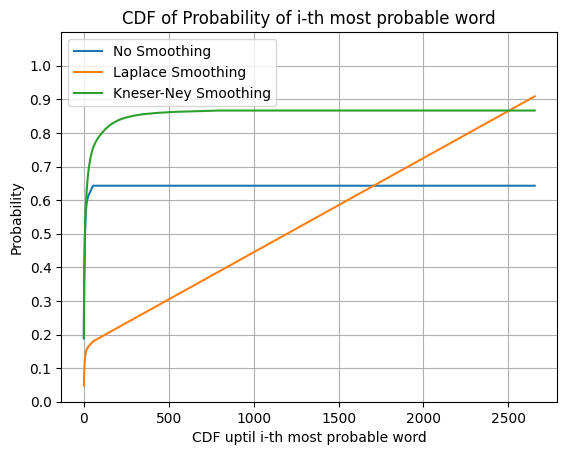

In [7]:
LMs = [none_lm, laplace_lm, kneser_ney_lm]
for i, lm in enumerate(LMs):
    probs = sorted([(w, math.exp(lm.conditional_prob("i", w))) for w in lm.tokenizer.tokens], key=lambda x: x[1], reverse=True)
    cdf = np.cumsum([p[1] for p in probs])
    plt.plot(cdf)

plt.legend(["No Smoothing", "Laplace Smoothing", "Kneser-Ney Smoothing"])
plt.title("CDF of Probability of i-th most probable word")
plt.ylim(0, 1.1)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xlabel("CDF uptil i-th most probable word")
plt.ylabel("Probability")
plt.grid(True)
plt.show()

In [54]:
for lm in LMs:
    sorted_probs = sorted([(w1,w2) for w1 in lm.tokenizer.tokens for w2 in lm.tokenizer.tokens],reverse=True,
                            key = lambda x: lm.conditional_prob(x[0],x[1]))
    top_5 = sorted_probs[:5]
    print(lm.smoothing)
    for x, y in top_5:
        print((x, y), ":", math.exp(lm.conditional_prob(x, y)))
    print()

None
('needed', 'her') : 1.0
('changed', 'his') : 1.0
('siren', 'in') : 1.0
('site', 'i') : 1.0
('red', 'may') : 1.0

laplace
('i', 'am') : 0.04823331463825013
('i', 'was') : 0.024677509814918678
('im', 'feeling') : 0.023152877085461356
('that', 'i') : 0.020281321557082108
('am', 'feeling') : 0.01954062392869387

kneser-ney
('href', 'http') : 0.940396589331747
('honoured', 'to') : 0.842388789741556
('hesitant', 'to') : 0.7947697421225083
('stage', 'i') : 0.7650373454954061
('faking', 'it') : 0.7545442527596008



### **Subtask 3**

The following cells contain the code for Task 2 Subtask 3. The implementation is done in `A1_Q2_2021475.py`.

In [11]:
from utils import emotion_scores
from A1_Q2_3_2021475 import ModifiedBiGramLM

emotions = {"sadness", "joy", "love", "anger", "fear", "surprise"}
emotion_token = {}
for i in lm.tokenizer.tokens:
    emotion_token[i] = emotion_scores(i)

lm_e = ModifiedBiGramLM("surprise", raw, emotion_token=emotion_token)

c:\Users\Divyajeet Singh\AppData\Local\Programs\Python\Python311\Lib\site-packages\transformers\pipelines\text_classification.py:104: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(
Xformers is not installed correctly. If you want to use memory_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.


Tokenizing
Preprocessing
Populating table
Calculating probabilities
Calculating modified probabilites


In [13]:
for emotion in emotions:
    lm_e = ModifiedBiGramLM(emotion, raw, emotion_token=emotion_token)
    print("Emotion being considered:", emotion)
    sample = lm_e.generate(NUM_WORDS)
    print(sample)
    print("Score of generated sample:")
    for score in emotion_scores(sample):
        print(f"{score}: {emotion_scores(sample)}")
    print()

Tokenizing
Preprocessing
Populating table
Calculating probabilities
Calculating modified probabilites
Emotion being considered: love
ror bless liked passion amorous amourous loved tha ering passionately gued
Score of generated sample:
{'label': 'sadness', 'score': 0.0011878983350470662}: [{'label': 'sadness', 'score': 0.0011878983350470662}, {'label': 'joy', 'score': 0.006928890012204647}, {'label': 'love', 'score': 0.9889363646507263}, {'label': 'anger', 'score': 0.001800358179025352}, {'label': 'fear', 'score': 0.0006113330600783229}, {'label': 'surprise', 'score': 0.0005352717125788331}]
{'label': 'joy', 'score': 0.006928890012204647}: [{'label': 'sadness', 'score': 0.0011878983350470662}, {'label': 'joy', 'score': 0.006928890012204647}, {'label': 'love', 'score': 0.9889363646507263}, {'label': 'anger', 'score': 0.001800358179025352}, {'label': 'fear', 'score': 0.0006113330600783229}, {'label': 'surprise', 'score': 0.0005352717125788331}]
{'label': 'love', 'score': 0.988936364650726

### **Subtask 4**

The following cells contain the code for Task 2 Subtask 4. The implementation is done in `A1_Q2_2020339.py`. In the module, grid search is conducted to find the best hyperparameters for the SVC model. Here, we use the best parameters we found to run the model. \
Note that the following code requires the above code cells to be executed first.

In [15]:
import numpy as np
import pandas as pd
import A1_Q2_3_2021475 as Modified_LM
from utils import emotion_scores
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report


NUM_EXAMPLES = 50
raw = open("Dataset/corpus.txt", "r").read().replace("\n", " ")
training_text = open("Dataset/corpus.txt", "r").read().splitlines()
training_labels = open("Dataset/labels.txt", "r").read().splitlines()
emotions = {"sadness": 0, "joy": 1, "love": 2, "anger": 3,"fear": 4, "surprise": 5}

test_files = [
    "generated_examples/gen_joy.txt",
    "generated_examples/gen_anger.txt",
    "generated_examples/gen_fear.txt",
    "generated_examples/gen_love.txt",
    "generated_examples/gen_sadness.txt",
    "generated_examples/gen_surprise.txt"
]

for emotion in emotions.keys():
    lm_e = Modified_LM.ModifiedBiGramLM(emotion,raw, emotion_token=emotion_token)
    with open(f"generated_examples/gen_{emotion}.txt", "w") as file:
        for _ in range(NUM_EXAMPLES):
            generated = lm_e.generate(NUM_WORDS, start=START)
            file.write(generated)
            file.write("\n")

Tokenizing
Preprocessing
Populating table
Calculating probabilities
Calculating modified probabilites
Tokenizing
Preprocessing
Populating table
Calculating probabilities
Calculating modified probabilites
Tokenizing
Preprocessing
Populating table
Calculating probabilities
Calculating modified probabilites
Tokenizing
Preprocessing
Populating table
Calculating probabilities
Calculating modified probabilites
Tokenizing
Preprocessing
Populating table
Calculating probabilities
Calculating modified probabilites
Tokenizing
Preprocessing
Populating table
Calculating probabilities
Calculating modified probabilites


In [41]:
with open("params.txt") as file:
    best_params = eval(file.read())
    print(best_params)

test_text = []
test_labels = []
NUM_EXAMPLES = 50

for file_path in test_files:
    with open(file_path, "r") as file:
        test_text += file.read().splitlines()
        label = file_path.split("_")[-1].split(".")[0]
        test_labels += [label] * NUM_EXAMPLES

vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(training_text)
X_test = vectorizer.transform(test_text)

{'C': 1, 'class_weight': None, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': 1000, 'random_state': 42}


In [ ]:
# RUN GRID SEARCH IF REQUIRED

grid_search = GridSearchCV(svm, params, n_jobs=-1)
grid_search.fit(X_train, training_labels)
best_params = grid_search.best_params_
y_test_pred = grid_search.predict(X_test)

with open("params.txt", "w") as param_file:
    param_file.write(str(best_params))

In [47]:
# OTHERWISE, READ FROM THE GENERATED TEXT FILE

svm = SVC(**best_params)
svm.fit(X_train, training_labels)
y_test_pred = svm.predict(X_test)

accuracy_test = accuracy_score(test_labels, y_test_pred)
print(f"Test Accuracy: {accuracy_test * 100:.2f}%")
print(classification_report(test_labels, y_test_pred))

# # IF NEEDED
# with open("metric.txt", "w") as metric_file:
#     metric_file.write(classification_report(test_labels, y_test_pred))

Test Accuracy: 63.67%
              precision    recall  f1-score   support

       anger       0.53      0.18      0.27        50
        fear       0.62      0.30      0.41        50
         joy       0.41      0.72      0.52        50
        love       0.96      0.94      0.95        50
     sadness       0.54      0.76      0.63        50
    surprise       0.88      0.92      0.90        50

    accuracy                           0.64       300
   macro avg       0.66      0.64      0.61       300
weighted avg       0.66      0.64      0.61       300



c:\Users\Divyajeet Singh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
